In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load the dataset
df = pd.read_csv('creditcard.csv')  # Ensure 'creditcard.csv' is in the working directory

# Display the first 5 rows
df.head()


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
# Get dataset information
df.info()

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

Class
0    284315
1    284315
Name: count, dtype: int64


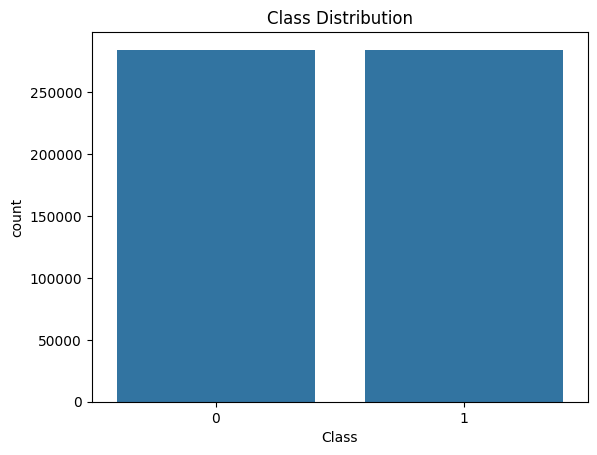

In [4]:
# Check class distribution
print(df['Class'].value_counts())

# Plot class distribution
sns.countplot(x=df['Class'])
plt.title('Class Distribution')
plt.show()


In [5]:
# Drop the 'id' column
df = df.drop(columns=['id'])


In [6]:
# Standardize the 'Amount' column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])


In [7]:
# Define features and target variable
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shapes
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (454904, 29), (454904,)
Testing set shape: (113726, 29), (113726,)


In [8]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


Accuracy: 99.98%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56844    19]
 [    0 56863]]


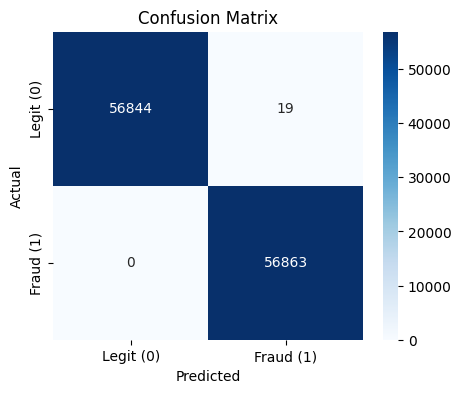

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit (0)", "Fraud (1)"], yticklabels=["Legit (0)", "Fraud (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


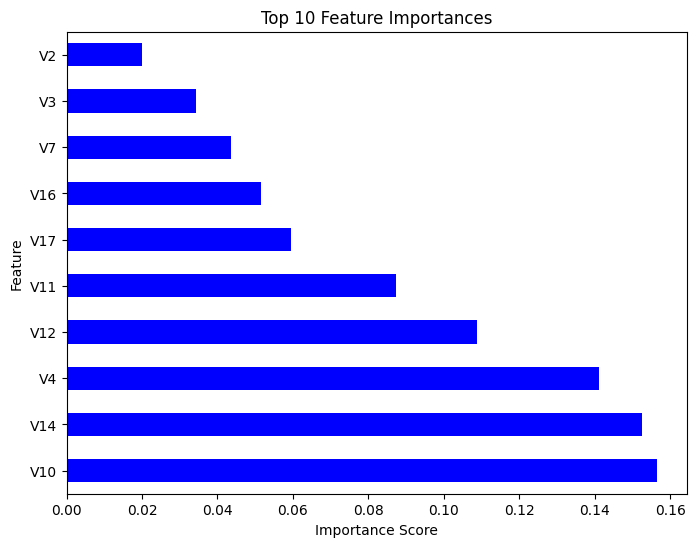

In [10]:
# Get feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plot top 10 important features
plt.figure(figsize=(8,6))
feature_importances.nlargest(10).plot(kind='barh', color='blue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [13]:
!pip install joblib



Defaulting to user installation because normal site-packages is not writeable

DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'credit_card_fraud_model.pkl')

print("Model saved successfully!")


Model saved successfully!


In [17]:
import joblib

# Load the saved model
loaded_model = joblib.load('credit_card_fraud_model.pkl')
print("Model loaded successfully!")


Model loaded successfully!


In [20]:
import pandas as pd

# Select a random sample from the test dataset
sample_index = 10  # Change this index to test different samples
sample_data = X_test.iloc[sample_index].values.reshape(1, -1)

# Convert the NumPy array to a DataFrame with feature names
sample_data = pd.DataFrame(sample_data, columns=X.columns)

# Get the actual class for reference
actual_class = y_test.iloc[sample_index]

# Predict using the loaded model
predicted_class = loaded_model.predict(sample_data)[0]

# Print the result
print(f"Actual Class: {'Fraud' if actual_class == 1 else 'Legit'} | Predicted Class: {'Fraud' if predicted_class == 1 else 'Legit'}")


Actual Class: Legit | Predicted Class: Legit


In [21]:
# Creating a synthetic transaction with made-up values
synthetic_data = np.array([[-1.5, 2.3, -0.5, 1.1, -2.0, 0.8, -1.0, 2.5, -1.3, 0.5, 
                            -0.2, 1.7, -2.4, 0.9, -1.6, 2.1, 0.4, -0.5, 1.2, -2.2, 
                            1.0, -1.8, 2.3, -0.9, 0.5, 1.7, -2.1, 0.6, 120.0]])  # Replace with real values

# Convert synthetic data to a DataFrame with correct feature names
synthetic_data = pd.DataFrame(synthetic_data, columns=X.columns)

# Normalize the 'Amount' column (keep it inside a DataFrame to avoid warnings)
synthetic_data['Amount'] = scaler.transform(synthetic_data[['Amount']])

# Predict fraud or not
predicted_class = loaded_model.predict(synthetic_data)[0]

# Output the prediction
print(f"Predicted Class for Synthetic Data: {'Fraud' if predicted_class == 1 else 'Legit'}")


Predicted Class for Synthetic Data: Legit


In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [23]:
# Get predicted probabilities for the positive class (fraud)
y_probs = loaded_model.predict_proba(X_test)[:, 1]  # Extract only fraud class probabilities


In [24]:
# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


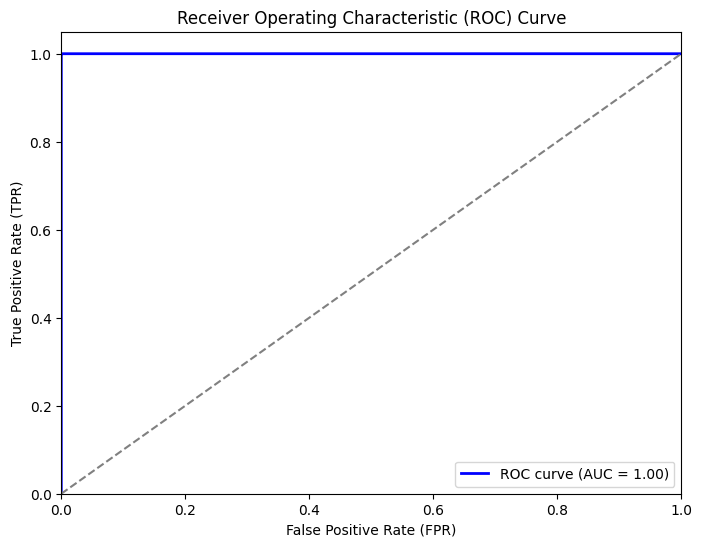

In [25]:
# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 99.98%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56844    19]
 [    0 56863]]


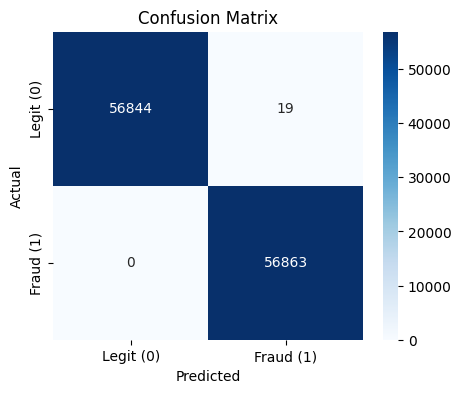

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit (0)", "Fraud (1)"], yticklabels=["Legit (0)", "Fraud (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
